## Case Study Assignment
#### Author of the notebook: Utkarsh Mujumdar

In [1]:
#Load the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
#Load training dataset
df = pd.read_csv("train.csv")

#Load test dataset
df_test = pd.read_csv("test.csv")

In [3]:
# To avoid a mismatch in number of features after one-hot encoding, we have to remove the categorical columns which have 
# different number of classes in the training and test dataset
col_categorical_train = [df.columns[i] for i in range(len(df.columns)) if df.iloc[:,i].dtype == 'object']
col_categorical_test = [df_test.columns[i] for i in range(len(df_test.columns)) if df_test.iloc[:,i].dtype == 'object']

for i in range(len(col_categorical_test)):
    if len(df[col_categorical_train[i]].value_counts()) != len(df_test[col_categorical_test[i]].value_counts()):
        df.drop(col_categorical_train[i],axis=1,inplace=True)
        df_test.drop(col_categorical_test[i],axis=1,inplace=True)

In [4]:
#Copies
df1 = df.copy()
df2 = df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

# Missing Value Treatments

In [6]:
#Get the names of columns containing null values
col_NA = [df1.columns[i] for i in range(len(df1.columns)) if df1.iloc[:,i].isna().sum()!=0]
col_NA

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCond',
 'Fence']

In [7]:
#Separate the numerical and categorical columns
col_NA_numeric= [col_NA[i] for i in range(len(col_NA)) if df1.loc[:,col_NA[i]].dtype != 'object']
col_NA_categorical = [col_NA[i] for i in range(len(col_NA)) if df1.loc[:,col_NA[i]].dtype == 'object']
print(col_NA_numeric)
print(col_NA_categorical)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'Fence']


In [8]:
#Get the descriptive statistics of the numerical variables
df1.loc[:,col_NA_numeric].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [9]:
#Imputation for numerical coulmns
df1[col_NA_numeric[0]].fillna(df1[col_NA_numeric[0]].mean(), inplace=True)
df1[col_NA_numeric[1]].fillna(df1[col_NA_numeric[1]].median(), inplace=True)
df1[col_NA_numeric[2]].fillna(df1[col_NA_numeric[2]].mean(), inplace=True)

In [10]:
df1.loc[:,col_NA_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         91 non-null     object
 1   MasVnrType    1452 non-null   object
 2   BsmtQual      1423 non-null   object
 3   BsmtCond      1423 non-null   object
 4   BsmtExposure  1422 non-null   object
 5   BsmtFinType1  1423 non-null   object
 6   BsmtFinType2  1422 non-null   object
 7   FireplaceQu   770 non-null    object
 8   GarageType    1379 non-null   object
 9   GarageFinish  1379 non-null   object
 10  GarageCond    1379 non-null   object
 11  Fence         281 non-null    object
dtypes: object(12)
memory usage: 137.0+ KB


In [11]:
#Imputation for categorical columns
for i in range(len(col_NA_categorical)):
    df1[col_NA_categorical[i]].fillna(df1[col_NA_categorical[i]].mode()[0], inplace=True)

In [12]:
df1.loc[:,col_NA].isna().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCond      0
Fence           0
dtype: int64

In [13]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,Inside,...,0,0,0,MnPrv,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,FR2,...,0,0,0,MnPrv,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,Inside,...,0,0,0,MnPrv,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,Corner,...,0,0,0,MnPrv,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,FR2,...,0,0,0,MnPrv,0,12,2008,WD,Normal,250000


# Data Transformation

In [14]:
#Using pd.getdummies for one-hot encoding
df1_dummies = pd.get_dummies(df1,drop_first=True)
df2 = df1_dummies
df1_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


# Outlier Treatment

In [15]:
#Detect and delete outliers from 'SalePrice'
q75, q25 = np.percentile(df2.loc[:,'SalePrice'], [75 ,25])
iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

df2 = df2.drop(df2[df2.loc[:,'SalePrice'] < minimum].index)
df2 = df2.drop(df2[df2.loc[:,'SalePrice'] > maximum].index)

df2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


# Data Normalization

In [16]:
#Get the list of numerical columns
col_numeric = [df2.columns[i] for i in range(len(df2.columns)) if df2.iloc[:,i].dtype != 'object']

#Exclude ID, Year & Dependent Variable columns 
col_numeric = [i for i in col_numeric if i not in ['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBuilt','YrSold','SalePrice']]

In [17]:
#Using min-max normalization
sc = MinMaxScaler()
for col in col_numeric:
    df2[col] = sc.fit_transform(df2[col].values.reshape(-1,1))

df2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,0.150685,0.043768,7,5,2003,2003,0.12250,0.125089,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,0.202055,0.050808,6,8,1976,1976,0.00000,0.173281,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,0.160959,0.060908,7,5,2001,2002,0.10125,0.086109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,0.133562,0.050502,7,5,1915,1970,0.00000,0.038271,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,0.215753,0.079334,8,5,2000,2000,0.21875,0.116052,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
len(df2)

1399

# Visualisation & Inference

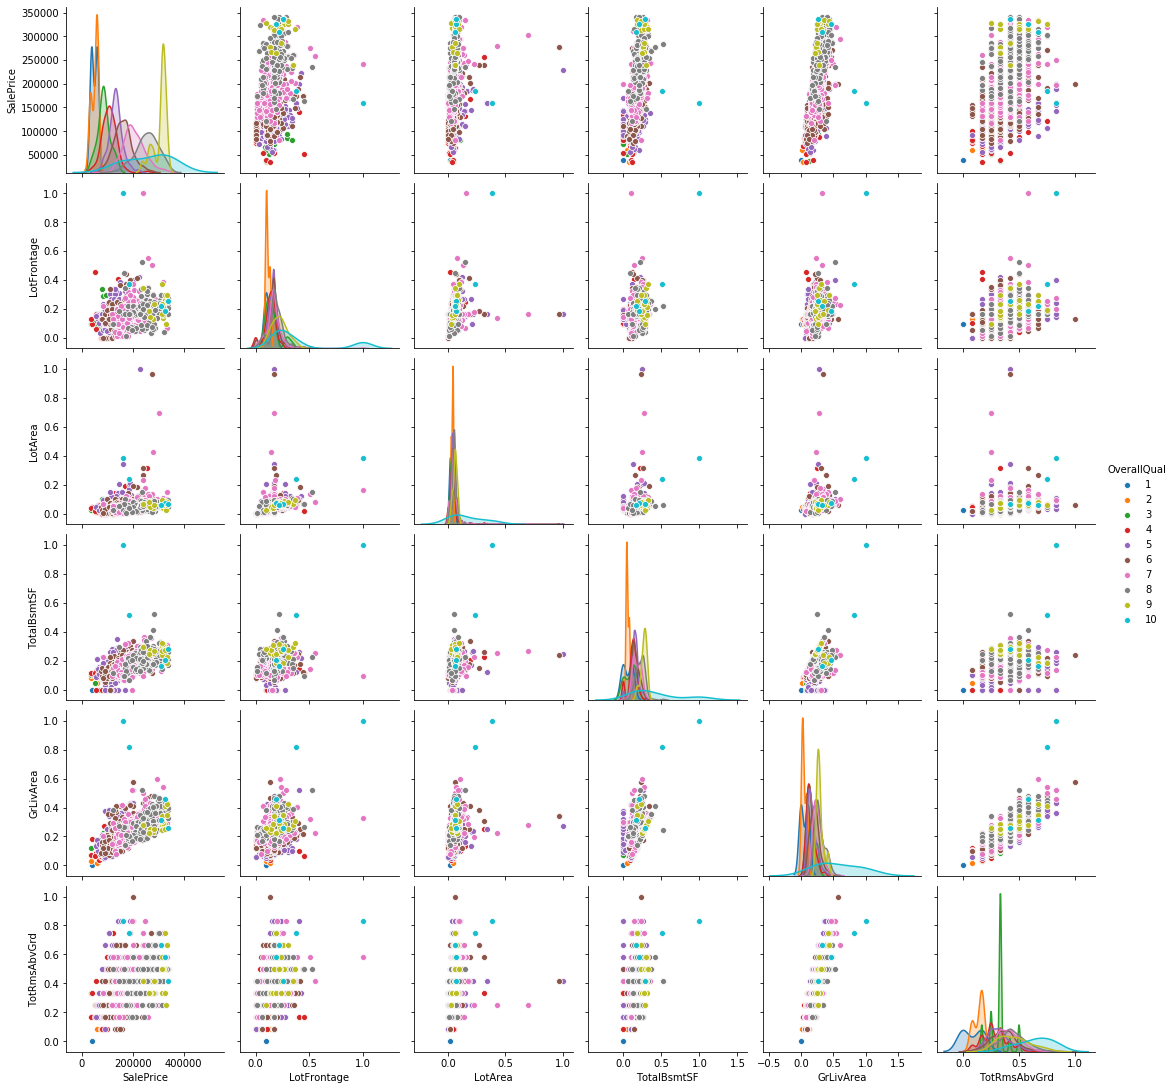

In [19]:
#Visualisation of independent variables vs dependent variable 'Sale Price'

#Relationship with numerical variables
sns.pairplot(df2, 
             vars=['SalePrice','LotFrontage','LotArea','TotalBsmtSF','GrLivArea','TotRmsAbvGrd'], 
             hue = 'OverallQual',  
             kind="scatter")
plt.show()

In [20]:
# Function to calculate correlation coefficient between two arrays and add them as a lable to the plot
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

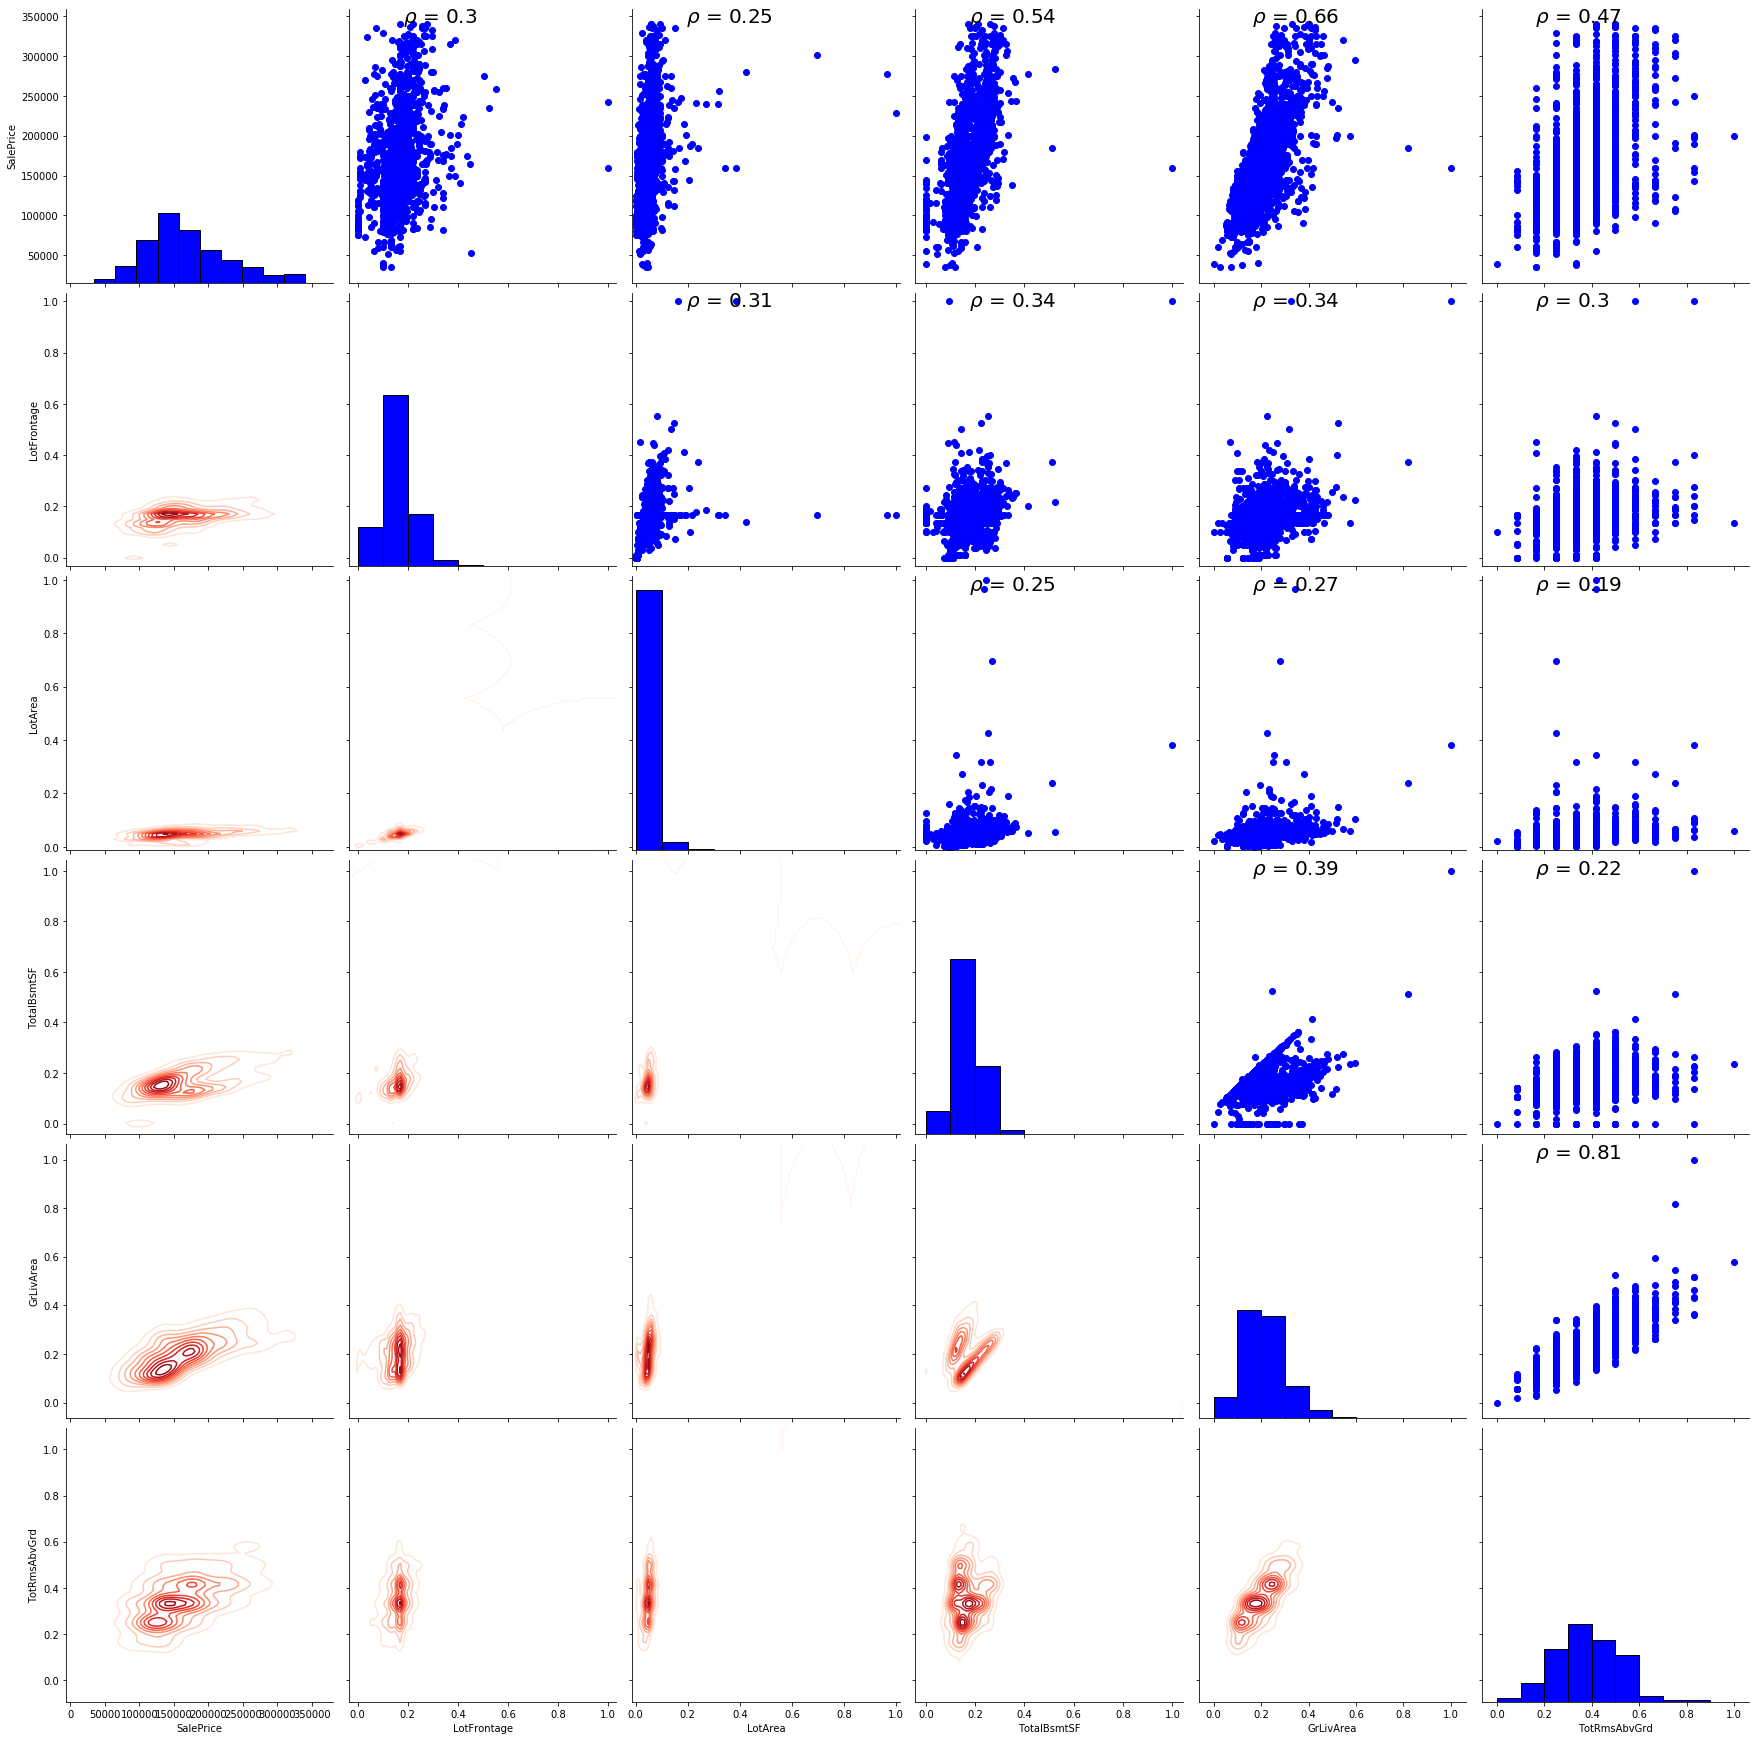

In [21]:
grid = sns.PairGrid(data= df2,
                    vars = ['SalePrice','LotFrontage','LotArea','TotalBsmtSF','GrLivArea','TotRmsAbvGrd'],
                    height = 4)

#Map a scatter plot to the upper triangle along with correlation coefficient values
grid = grid.map_upper(plt.scatter, color = 'blue')
grid = grid.map_upper(corr)

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'blue', 
                    edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

# Training the Model

In [22]:
#Assigning independent and dependent variables
temp = [i for i in df2.columns if i!='SalePrice']
x = df2[temp]
y = df2['SalePrice']

In [23]:
#Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
#Training
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#Coefficients & Intercept of the trained model
print(regressor.intercept_)
print(regressor.coef_)

974199.0206019888
[-2.76559817e+00 -1.40478050e+02 -4.10769208e+04  7.11597988e+04
  6.42207255e+03  4.60379175e+03  1.72345241e+02  3.34665615e+01
 -8.17913474e+02 -3.79695024e+04  1.00415276e+04  3.01294614e+03
 -3.16442265e+04  9.77930169e+04  2.76116953e+04 -1.78257564e+03
  8.95702392e+04  2.33587939e+04  4.07045630e+03  1.42522530e+04
  1.03256320e+03  2.07433116e+04 -3.49390861e+04  1.48669812e+04
  1.71302751e+04 -4.62090321e+03  3.07948188e+04  1.28065041e+04
  1.55644230e+04  7.19163315e+03  5.47500272e+03  2.63672514e+04
  2.32889772e+04 -1.56759178e+04  2.26460904e+04 -3.99049472e+01
 -6.95048123e+02  2.62440396e+04  2.97139870e+04  2.84198708e+04
  2.40870851e+04  2.29141300e+04  6.90551390e+03  2.37933021e+02
 -1.23788516e+04  1.31690417e+03  1.22184051e+04  1.47954261e+04
  1.22080935e+04  4.81816046e+03 -7.15297234e+03 -1.10567682e+04
 -1.72906631e+03  8.48979940e+03 -3.00510827e+04 -8.30834550e+03
  9.30994116e+03  6.86180652e+02  5.40098889e+03 -2.41796849e+03
  1.299

# Prediction for test dataset

In [26]:
#Preprocessing and cleaning

#Copies
df1_test = df_test.copy()
df2_test = df_test.copy()

#Get the names of columns containing null values
col_NA_test = [df1_test.columns[i] for i in range(len(df1_test.columns)) if df1_test.iloc[:,i].isna().sum()!=0]

#Separate the numerical and categorical columns
col_NA_test_numeric= [col_NA_test[i] for i in range(len(col_NA_test)) if df1_test.loc[:,col_NA_test[i]].dtype != 'object']
col_NA_test_categorical = [col_NA_test[i] for i in range(len(col_NA_test)) if df1_test.loc[:,col_NA_test[i]].dtype == 'object']

In [27]:
#Get the descriptive statistics of the numerical variables
df1_test.loc[:,col_NA_test_numeric].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,1232.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000,1458.000000
mean,68.580357,100.709141,439.203704,52.619342,554.294925,1046.117970,0.434454,0.065202,1977.721217,1.766118,472.768861
std,22.376841,177.625900,455.268042,176.753926,437.260486,442.898624,0.530648,0.252468,26.431175,0.775945,217.048611
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1959.000000,1.000000,318.000000
50%,67.000000,0.000000,350.500000,0.000000,460.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,200.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [28]:
df1_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,...,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,...,0,0,0,0,NaN,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,...,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,...,0,0,0,0,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,...,0,0,144,0,NaN,0,1,2010,WD,Normal


In [29]:
for i in [0,2,4,5,6,7,8,9,10]:
    df1_test[col_NA_test_numeric[i]].fillna(df1_test[col_NA_test_numeric[i]].mean(), inplace=True)
    
for i in [1,3]:
    df1_test[col_NA_test_numeric[i]].fillna(df1_test[col_NA_test_numeric[i]].median(), inplace=True)


In [30]:
df1_test.loc[:,col_NA_test_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1455 non-null   object
 1   Alley         107 non-null    object
 2   MasVnrType    1443 non-null   object
 3   BsmtQual      1415 non-null   object
 4   BsmtCond      1414 non-null   object
 5   BsmtExposure  1415 non-null   object
 6   BsmtFinType1  1417 non-null   object
 7   BsmtFinType2  1417 non-null   object
 8   KitchenQual   1458 non-null   object
 9   Functional    1457 non-null   object
 10  FireplaceQu   729 non-null    object
 11  GarageType    1383 non-null   object
 12  GarageFinish  1381 non-null   object
 13  GarageCond    1381 non-null   object
 14  Fence         290 non-null    object
 15  SaleType      1458 non-null   object
dtypes: object(16)
memory usage: 182.5+ KB


In [31]:
#Imputation for categorical columns
for i in range(len(col_NA_test_categorical)):
    df1_test[col_NA_test_categorical[i]].fillna(df1_test[col_NA_test_categorical[i]].mode()[0], inplace=True)

In [32]:
df1_test.loc[:,col_NA_test].isna().sum()

MSZoning        0
LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageCond      0
Fence           0
SaleType        0
dtype: int64

In [33]:
#Using pd.getdummies for one-hot encoding
df1_test_dummies = pd.get_dummies(df1_test,drop_first=True)
df2_test = df1_test_dummies

In [34]:
#Get the list of numerical columns
col_numeric_test = [df1_test.columns[i] for i in range(len(df1_test.columns)) if df1_test.iloc[:,i].dtype != 'object']

#Exclude ID & Year columns 
col_numeric_test = [i for i in col_numeric_test if i not in ['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBuilt','YrSold']]

#Using min-max normalization
sc = MinMaxScaler()
for col in col_numeric_test:
    df2_test[col] = sc.fit_transform(df2_test[col].values.reshape(-1,1))

In [35]:
print(len(df2),len(df2_test))

1399 1459


In [36]:
len(df2_test.columns) == len(df2.columns)-1

True

In [37]:
#Prediction
pred = regressor.predict(df2_test)
y_pred = regressor.predict(x_test)

In [38]:
#Output the predicted values in a csv file
predictions = pd.Series(pred)
output = pd.concat([df2_test.loc[:,'Id'],predictions],axis=1)
output.columns = ['ID','SalePrice']

output.to_csv("Submission.csv",index=False)

# Model Evaluation

In [40]:
# R2 Score and Root Mean Squared Error
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE= ",rmse)
print("R2 Score=", r2)

RMSE=  23394.635948596457
R2 Score= 0.8577685982637312


Text(0.5, 1.0, 'Residual plot')

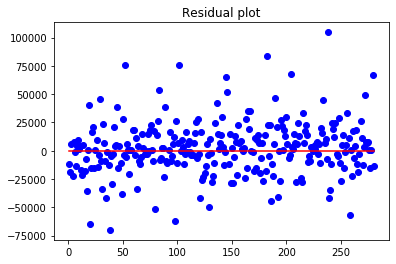

In [41]:
# residual plot
x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x, (y_test-y_pred), c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')

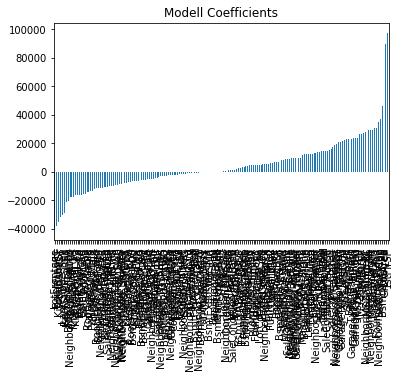

In [42]:
# Plot the most important features of the model
predictors = x_train.columns
coef = pd.Series(regressor.coef_, predictors).sort_values()

coef.plot(kind='bar', title='Modell Coefficients')

# Regularization 

### Ridge Regression

In [49]:
#Ridge Regression
ridgeReg = Ridge(alpha=0.1, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred))
r2_ridge=r2_score(y_test, pred)
print('RMSE= ', rmse_ridge, 'R2 = ', r2_ridge)

RMSE=  22918.86251527404 R2 =  0.8634948532576627


In [50]:
# To display coefficients of Linear and Ridge regression in a tabular form
df=pd.DataFrame(columns=['Linear Reg', 'Ridge Reg'])

for i in range(len(ridgeReg.coef_)):
    df=df.append({'Linear Reg': regressor.coef_[i], 'Ridge Reg':ridgeReg.coef_[i]},
                 ignore_index=True)
    
df

,Linear Reg,Ridge Reg
0,-2.765598,-2.644843
1,-140.478050,-96.518545
2,-41076.920759,-19613.851476
3,71159.798799,53852.318959
4,6422.072548,6676.215060
...,...,...
172,1527.495288,1346.444523
173,14955.891178,8070.143487
174,8694.568147,2617.555147
175,9680.768526,7943.666221


### Lasso Regression

In [51]:
#Lasso Regression
lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred))
r2_lasso=r2_score(y_test, pred)
print('RMSE =', rmse_lasso)    
print('R-square=', r2_lasso)

RMSE = 23352.830277180336
R-square= 0.8582764725051852


In [52]:
df=pd.DataFrame(columns=['Linear Reg', 'Ridge Reg','Lasso Reg'])

for i in range(len(ridgeReg.coef_)):
    df=df.append({'Linear Reg': regressor.coef_[i], 
                  'Ridge Reg':ridgeReg.coef_[i],
                  'Lasso Reg':lassoReg.coef_[i]
                 }, ignore_index=True)
    
df

,Linear Reg,Ridge Reg,Lasso Reg
0,-2.765598,-2.644843,-2.748420
1,-140.478050,-96.518545,-140.545024
2,-41076.920759,-19613.851476,-40507.391549
3,71159.798799,53852.318959,70632.143239
4,6422.072548,6676.215060,6461.771206
...,...,...,...
172,1527.495288,1346.444523,1648.973274
173,14955.891178,8070.143487,14741.199597
174,8694.568147,2617.555147,8503.272145
175,9680.768526,7943.666221,9658.336016


In [54]:
#Comparison of all three regression models

data = {'Model': ['Linear Regression','Ridge Regression','Lasso Regression'],
        'RMSE':  [rmse,rmse_ridge,rmse_lasso],
        'R2 Score': [r2,r2_ridge,r2_lasso],
        }

df_compare = pd.DataFrame (data)
df_compare

,Model,RMSE,R2 Score
0,Linear Regression,23352.830277,0.858276
1,Ridge Regression,22918.862515,0.863495
2,Lasso Regression,23352.830277,0.858276


# Summary

* After the consideration of regularization, ridge regression model will be best suited for prediction, with alpha=0.1.

* Even without regulariztion, the linear model performed very well, so regularization can be avoided

* Further improvement in model performance can be achieved by feature selection 